In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
reviews_df = pd.read_csv("British_airlines_reviews_data.csv")

reviews_df.head(20)

,message,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft
0,"[""✅ Trip Verified | I am writing to express my...",Family Leisure,Economy Class,Istanbul to South Africa via Kayseri,September 2024,no,NaN
1,['✅ Trip Verified | My review/feedback to the...,Couple Leisure,Economy Class,Bodrum to Istanbul,August 2024,no,NaN
2,['✅ Trip Verified | I have always rated Turkis...,Family Leisure,Economy Class,Cape Town to Split via Istanbul,August 2024,no,NaN
3,['✅ Trip Verified |\xa0 \xa0Turkish Airlines i...,Business,Economy Class,Belgrade to Mumbai via Istanbul,August 2024,no,NaN
4,"[""✅ Trip Verified | Our flight was delayed f...",Family Leisure,Economy Class,Kuala Lumpur to Düsseldorf via Istanbul,August 2024,no,NaN
5,"[""✅ Trip Verified | I had an awful experienc...",Family Leisure,Economy Class,London to Lahore via Istanbul,August 2024,no,NaN
6,"[""✅ Trip Verified | I recently traveled with T...",Solo Leisure,Economy Class,Tashkent to Riga via Istanbul,August 2024,no,NaN
7,['✅ Trip Verified | Turkish Airlines has a gre...,Solo Leisure,Economy Class,Mexico City to Kuala Lumpur via Istanbul,August 2024,no,NaN
8,"[""✅ Trip Verified | To begin with, the Turki...",Solo Leisure,Business Class,Geneva to Kuala Lumpur via Istanbul,August 2024,yes,A320 / Boeing 777
9,"[""Not Verified | My little boy didn't recieve ...",Family Leisure,Economy Class,Manchester to Durban via Istanbul,August 2024,no,NaN


In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   message            100 non-null    object
 1   Type Of Traveller  100 non-null    object
 2   Seat Type          100 non-null    object
 3   Route              99 non-null     object
 4   Date Flown         100 non-null    object
 5   Recommended        100 non-null    object
 6   Aircraft           29 non-null     object
dtypes: object(7)
memory usage: 5.6+ KB


In [4]:
reviews_df.isnull().sum()

message               0
Type Of Traveller     0
Seat Type             0
Route                 1
Date Flown            0
Recommended           0
Aircraft             71
dtype: int64

In [5]:
reviews_df.duplicated().sum()

0

In [6]:
import re

In [7]:
# Function to clean text
def clean_text(text):
    text = re.sub(r'✅|\|', '', text)  # Remove emojis and pipe symbols
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters & numbers
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

In [8]:
# Apply text cleaning correctly
reviews_df['cleaned_message'] = reviews_df['message'].apply(clean_text)


In [9]:
reviews_df.head()

,message,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,cleaned_message
0,"[""✅ Trip Verified | I am writing to express my...",Family Leisure,Economy Class,Istanbul to South Africa via Kayseri,September 2024,no,NaN,trip verified i am writing to express my diss...
1,['✅ Trip Verified | My review/feedback to the...,Couple Leisure,Economy Class,Bodrum to Istanbul,August 2024,no,NaN,trip verified my reviewfeedback to the airli...
2,['✅ Trip Verified | I have always rated Turkis...,Family Leisure,Economy Class,Cape Town to Split via Istanbul,August 2024,no,NaN,trip verified i have always rated turkish air...
3,['✅ Trip Verified |\xa0 \xa0Turkish Airlines i...,Business,Economy Class,Belgrade to Mumbai via Istanbul,August 2024,no,NaN,trip verified xa xaturkish airlines is the wor...
4,"[""✅ Trip Verified | Our flight was delayed f...",Family Leisure,Economy Class,Kuala Lumpur to Düsseldorf via Istanbul,August 2024,no,NaN,trip verified our flight was delayed for al...


In [10]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   message            100 non-null    object
 1   Type Of Traveller  100 non-null    object
 2   Seat Type          100 non-null    object
 3   Route              99 non-null     object
 4   Date Flown         100 non-null    object
 5   Recommended        100 non-null    object
 6   Aircraft           29 non-null     object
 7   cleaned_message    100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


In [11]:
reviews_df.drop("message",axis=1,inplace= True)

In [12]:
print(reviews_df['cleaned_message'].str.contains("trip verified").sum())
print(reviews_df['cleaned_message'].str.contains("not verified").sum())


76
24


In [14]:
def extract_verification(text):
    text = text.lower().strip()  # Ensure lowercase matching
    if "trip verified" in text:
        return "verified"
    elif "not verified" in text:
        return "not verified"
    else:
        return "unknown"


In [15]:
reviews_df['verification_status'] = reviews_df['cleaned_message'].str.extract(r'(trip verified|not verified)', expand=False).fillna('unknown')


In [16]:
# Remove "trip verified" and "not verified" from cleaned_message
reviews_df['cleaned_message'] = reviews_df['cleaned_message'].str.replace(r'\b(trip verified|not verified)\b', '', regex=True).str.strip()


In [17]:
reviews_df.head()

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,Aircraft,cleaned_message,verification_status
0,Family Leisure,Economy Class,Istanbul to South Africa via Kayseri,September 2024,no,NaN,i am writing to express my dissatisfaction wit...,trip verified
1,Couple Leisure,Economy Class,Bodrum to Istanbul,August 2024,no,NaN,my reviewfeedback to the airline was as follow...,trip verified
2,Family Leisure,Economy Class,Cape Town to Split via Istanbul,August 2024,no,NaN,i have always rated turkish airlines highly f...,trip verified
3,Business,Economy Class,Belgrade to Mumbai via Istanbul,August 2024,no,NaN,xa xaturkish airlines is the worst airlines i ...,trip verified
4,Family Leisure,Economy Class,Kuala Lumpur to Düsseldorf via Istanbul,August 2024,no,NaN,our flight was delayed for almost hours in ku...,trip verified


In [18]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Type Of Traveller    100 non-null    object
 1   Seat Type            100 non-null    object
 2   Route                99 non-null     object
 3   Date Flown           100 non-null    object
 4   Recommended          100 non-null    object
 5   Aircraft             29 non-null     object
 6   cleaned_message      100 non-null    object
 7   verification_status  100 non-null    object
dtypes: object(8)
memory usage: 6.4+ KB


In [19]:
reviews_df.drop("Aircraft",axis=1,inplace=True)

In [20]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Type Of Traveller    100 non-null    object
 1   Seat Type            100 non-null    object
 2   Route                99 non-null     object
 3   Date Flown           100 non-null    object
 4   Recommended          100 non-null    object
 5   cleaned_message      100 non-null    object
 6   verification_status  100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [21]:
reviews_df["Route"].fillna(reviews_df["Route"].mode()[0], inplace=True)

C:\Users\Victory\AppData\Local\Temp/ipykernel_780/3880873624.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  reviews_df["Route"].fillna(reviews_df["Route"].mode()[0], inplace=True)


In [22]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Type Of Traveller    100 non-null    object
 1   Seat Type            100 non-null    object
 2   Route                100 non-null    object
 3   Date Flown           100 non-null    object
 4   Recommended          100 non-null    object
 5   cleaned_message      100 non-null    object
 6   verification_status  100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [23]:
reviews_df.head(20)

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,cleaned_message,verification_status
0,Family Leisure,Economy Class,Istanbul to South Africa via Kayseri,September 2024,no,i am writing to express my dissatisfaction wit...,trip verified
1,Couple Leisure,Economy Class,Bodrum to Istanbul,August 2024,no,my reviewfeedback to the airline was as follow...,trip verified
2,Family Leisure,Economy Class,Cape Town to Split via Istanbul,August 2024,no,i have always rated turkish airlines highly f...,trip verified
3,Business,Economy Class,Belgrade to Mumbai via Istanbul,August 2024,no,xa xaturkish airlines is the worst airlines i ...,trip verified
4,Family Leisure,Economy Class,Kuala Lumpur to Düsseldorf via Istanbul,August 2024,no,our flight was delayed for almost hours in ku...,trip verified
5,Family Leisure,Economy Class,London to Lahore via Istanbul,August 2024,no,i had an awful experience travelling turkish a...,trip verified
6,Solo Leisure,Economy Class,Tashkent to Riga via Istanbul,August 2024,no,i recently traveled with turkish airlines and ...,trip verified
7,Solo Leisure,Economy Class,Mexico City to Kuala Lumpur via Istanbul,August 2024,no,turkish airlines has a great potential to beco...,trip verified
8,Solo Leisure,Business Class,Geneva to Kuala Lumpur via Istanbul,August 2024,yes,to begin with the turkish airlines app wouldnt...,trip verified
9,Family Leisure,Economy Class,Manchester to Durban via Istanbul,August 2024,no,my little boy didnt recieve the kids meal or t...,not verified


In [24]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [25]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores

In [26]:
# Apply sentiment analysis to the cleaned_message column
reviews_df['sentiment_scores'] = reviews_df['cleaned_message'].apply(analyze_sentiment)

# Expand the sentiment scores into separate columns
sentiment_df = pd.json_normalize(reviews_df['sentiment_scores'])

# Drop existing sentiment columns if they exist
reviews_df.drop(columns=['neg', 'neu', 'pos', 'compound'], errors='ignore', inplace=True)

# Join the new sentiment DataFrame
reviews_df = reviews_df.join(sentiment_df)

# Drop the original sentiment_scores column if you don't need it
reviews_df.drop(columns=['sentiment_scores'], inplace=True)

# Display the updated DataFrame
print(reviews_df)

   Type Of Traveller       Seat Type                                    Route  \
0     Family Leisure   Economy Class     Istanbul to South Africa via Kayseri   
1     Couple Leisure   Economy Class                       Bodrum to Istanbul   
2     Family Leisure   Economy Class          Cape Town to Split via Istanbul   
3           Business   Economy Class          Belgrade to Mumbai via Istanbul   
4     Family Leisure   Economy Class  Kuala Lumpur to Düsseldorf via Istanbul   
..               ...             ...                                      ...   
95    Family Leisure   Economy Class           Chisinau to Miami via Istanbul   
96          Business  Business Class           Dubai to New York via Istanbul   
97    Family Leisure   Economy Class                      Kayseri to Istanbul   
98          Business   Economy Class                   Istanbul to Manchester   
99          Business  Business Class            Bogota to Dublin via Istanbul   

        Date Flown Recommen

In [27]:
reviews_df.head(20)

,Type Of Traveller,Seat Type,Route,Date Flown,Recommended,cleaned_message,verification_status,neg,neu,pos,compound
0,Family Leisure,Economy Class,Istanbul to South Africa via Kayseri,September 2024,no,i am writing to express my dissatisfaction wit...,trip verified,0.135,0.740,0.126,-0.0431
1,Couple Leisure,Economy Class,Bodrum to Istanbul,August 2024,no,my reviewfeedback to the airline was as follow...,trip verified,0.078,0.816,0.106,0.7834
2,Family Leisure,Economy Class,Cape Town to Split via Istanbul,August 2024,no,i have always rated turkish airlines highly f...,trip verified,0.105,0.837,0.058,-0.6929
3,Business,Economy Class,Belgrade to Mumbai via Istanbul,August 2024,no,xa xaturkish airlines is the worst airlines i ...,trip verified,0.079,0.839,0.083,0.4400
4,Family Leisure,Economy Class,Kuala Lumpur to Düsseldorf via Istanbul,August 2024,no,our flight was delayed for almost hours in ku...,trip verified,0.043,0.874,0.084,0.9592
5,Family Leisure,Economy Class,London to Lahore via Istanbul,August 2024,no,i had an awful experience travelling turkish a...,trip verified,0.085,0.896,0.019,-0.9572
6,Solo Leisure,Economy Class,Tashkent to Riga via Istanbul,August 2024,no,i recently traveled with turkish airlines and ...,trip verified,0.132,0.773,0.096,-0.9241
7,Solo Leisure,Economy Class,Mexico City to Kuala Lumpur via Istanbul,August 2024,no,turkish airlines has a great potential to beco...,trip verified,0.086,0.810,0.104,0.5917
8,Solo Leisure,Business Class,Geneva to Kuala Lumpur via Istanbul,August 2024,yes,to begin with the turkish airlines app wouldnt...,trip verified,0.047,0.844,0.109,0.9935
9,Family Leisure,Economy Class,Manchester to Durban via Istanbul,August 2024,no,my little boy didnt recieve the kids meal or t...,not verified,0.068,0.906,0.026,-0.7704


In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [31]:

# Load dataset (assuming reviews_df is already loaded)
# Convert 'Recommended' column into true sentiment labels
reviews_df['true_sentiment'] = reviews_df['Recommended'].map({'yes': 1, 'no': 0})

# Convert VADER compound score into predicted sentiment
def get_sentiment_label(compound_score):
    if compound_score > 0.05:
        return 1  # Positive
    elif compound_score < -0.05:
        return 0  # Negative
    else:
        return 2  # Neutral (if you want to include neutral as a separate class)

reviews_df['predicted_sentiment'] = reviews_df['compound'].apply(get_sentiment_label)

# Evaluate the model
accuracy = accuracy_score(reviews_df['true_sentiment'], reviews_df['predicted_sentiment'])
conf_matrix = confusion_matrix(reviews_df['true_sentiment'], reviews_df['predicted_sentiment'])
class_report = classification_report(reviews_df['true_sentiment'], reviews_df['predicted_sentiment'])

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.87
Confusion Matrix:
[[69 12  1]
 [ 0 18  0]
 [ 0  0  0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        82
           1       0.60      1.00      0.75        18
           2       0.00      0.00      0.00         0

    accuracy                           0.87       100
   macro avg       0.53      0.61      0.55       100
weighted avg       0.93      0.87      0.88       100



C:\Users\Victory\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Victory\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Victory\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


C:\Users\Victory\AppData\Local\Temp/ipykernel_780/3192704310.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_sentiment', data=reviews_df, palette='coolwarm')


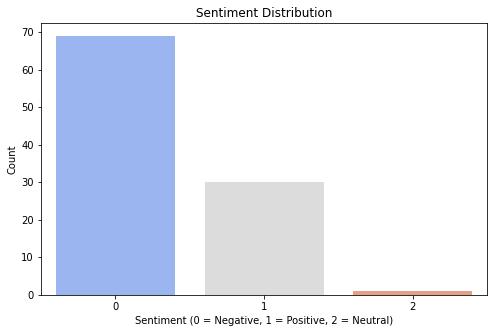

In [32]:

plt.figure(figsize=(8, 5))
sns.countplot(x='predicted_sentiment', data=reviews_df, palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive, 2 = Neutral)')
plt.ylabel('Count')
plt.show()

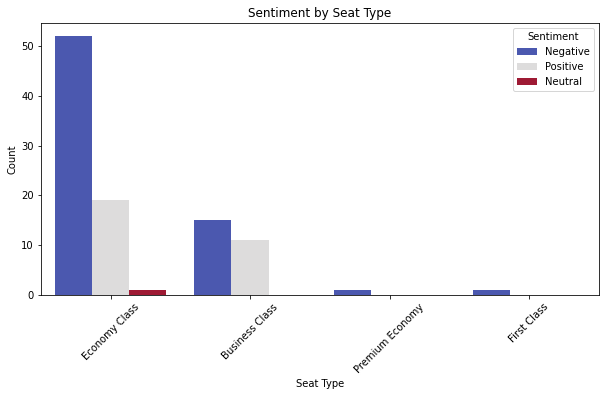

In [33]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Seat Type', hue='predicted_sentiment', data=reviews_df, palette='coolwarm')
plt.title('Sentiment by Seat Type')
plt.xlabel('Seat Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Sentiment", labels=["Negative", "Positive", "Neutral"])
plt.show()

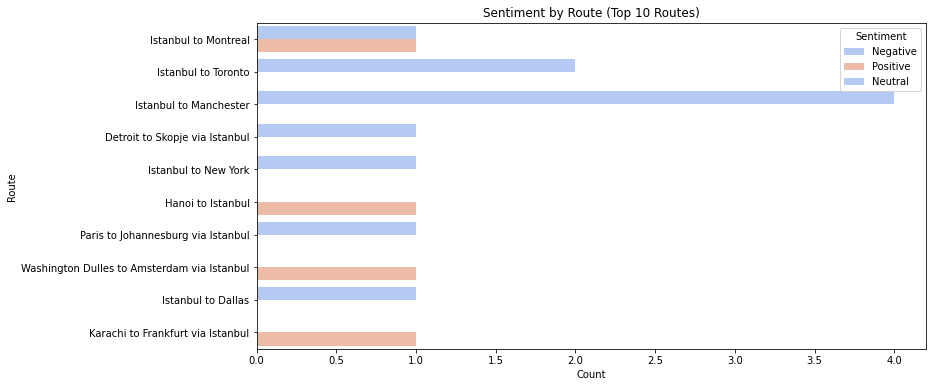

In [34]:
top_routes = reviews_df['Route'].value_counts().nlargest(10).index
filtered_df = reviews_df[reviews_df['Route'].isin(top_routes)]

plt.figure(figsize=(12, 6))
sns.countplot(y='Route', hue='predicted_sentiment', data=filtered_df, palette='coolwarm')
plt.title('Sentiment by Route (Top 10 Routes)')
plt.xlabel('Count')
plt.ylabel('Route')
plt.legend(title="Sentiment", labels=["Negative", "Positive", "Neutral"])
plt.show()

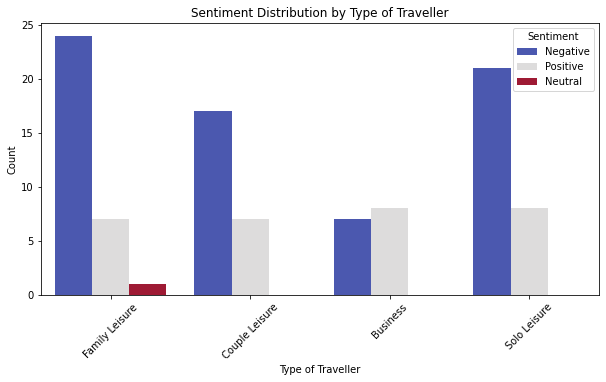

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Type Of Traveller', hue='predicted_sentiment', data=reviews_df, palette='coolwarm')
plt.title('Sentiment Distribution by Type of Traveller')
plt.xlabel('Type of Traveller')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Sentiment", labels=["Negative", "Positive", "Neutral"])
plt.show()

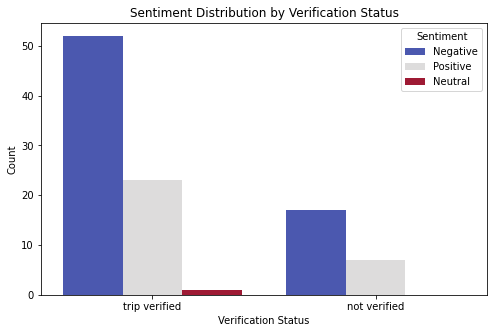

In [37]:
plt.figure(figsize=(8, 5))
sns.countplot(x='verification_status', hue='predicted_sentiment', data=reviews_df, palette='coolwarm')
plt.title('Sentiment Distribution by Verification Status')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.legend(title="Sentiment", labels=["Negative", "Positive", "Neutral"])
plt.show()

In [42]:
# Convert 'Date Flown' to datetime format
reviews_df['Date Flown'] = pd.to_datetime(reviews_df['Date Flown'], errors='coerce')

C:\Users\Victory\AppData\Local\Temp/ipykernel_780/3362450199.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  reviews_df['Date Flown'] = pd.to_datetime(reviews_df['Date Flown'], errors='coerce')


In [50]:

# Extract year and month, then convert it to categorical format
reviews_df['Year-Month'] = reviews_df['Date Flown'].dt.strftime('%Y-%m')  # Convert to 'YYYY-MM' string
reviews_df['Year-Month'] = pd.Categorical(reviews_df['Year-Month'], ordered=True)

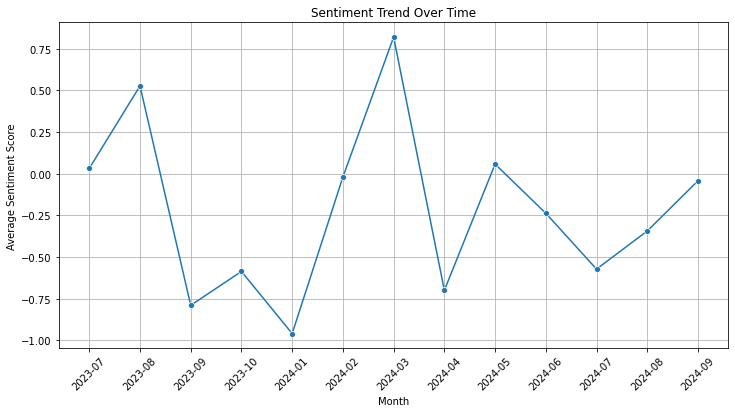

In [51]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=reviews_df, x='Year-Month', y='compound', estimator='mean', marker='o', errorbar=None)
plt.xticks(rotation=45)
plt.title('Sentiment Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Sentiment Score')
plt.grid(True)
plt.show()